##**Next Word Prediction Model**
Most of the keyboards in smartphones give next word prediction features; google also uses next word prediction based on our browsing history. So a preloaded data is also stored in the keyboard function of our smartphones to predict the next word correctly. In this article, I will train a Deep Learning model for next word prediction using Python. I will use the Tensorflow and Keras library in Python for next word prediction model.

For making a Next Word Prediction model, I will train a Recurrent Neural Network (RNN). So let’s start with this task now without wasting any time.

In [29]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

*As I told earlier, Google uses our browsing history to make next word predictions, smartphones, and all the keyboards that are trained to predict the next word are trained using some data. So I will also use a dataset.*

In [4]:
path='/content/Next_Word.txt'
text=open(path).read().lower()
print('Corpus length',len(text))

Corpus length 581888


Now I will split the dataset into each word in order but without the presence of some special characters.

In [5]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

Now the next process will be performing the feature engineering in our data. For this purpose, we will require a dictionary with each word in the data within the list of unique words as the key, and it’s significant portions as value.



In [6]:
unique_words=np.unique(words)
unique_word_index=dict((c, i) for i, c in enumerate(unique_words))

Feature Engineering
Feature Engineering means taking whatever information we have about our problem and turning it into numbers that we can use to build our feature matrix.

Here I will define a Word length which will represent the number of previous words that will determine our next word. I will define prev words to keep five previous words and their corresponding next words in the list of next words.

Here I will define a Word length which will represent the number of previous words that will determine our next word. I will define prev words to keep five previous words and their corresponding next words in the list of next words.

In [7]:
word_length=5
prev_words=[]
next_words=[]
for i in range(len(words)-word_length):
  prev_words.append(words[i:i+word_length])
  next_words.append(words[i+word_length])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


Now I will create two numpy arrays x for storing the features and y for storing its corresponding label. I will iterate x and y if the word is available so that the corresponding position becomes 1.

In [17]:
X = np.zeros((len(prev_words), word_length, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [19]:
print(X[0][0])

[False False False ... False False False]


##**Building the Recurrent Neural network**
As I stated earlier, I will use the Recurrent Neural networks for next word prediction model. Here I will use the LSTM model, which is a very powerful RNN.

In [24]:
model = Sequential()
model.add(LSTM(128, input_shape=(word_length, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [31]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
811/811 [==============================] - 13s 13ms/step - loss: 5.8183 - accuracy: 0.1745 - val_loss: 7.8585 - val_accuracy: 0.1093
Epoch 2/10
811/811 [==============================] - 10s 12ms/step - loss: 5.4173 - accuracy: 0.2110 - val_loss: 8.1613 - val_accuracy: 0.1023
Epoch 3/10
811/811 [==============================] - 10s 12ms/step - loss: 5.0440 - accuracy: 0.2537 - val_loss: 8.2875 - val_accuracy: 0.0912
Epoch 4/10
811/811 [==============================] - 10s 12ms/step - loss: 4.7025 - accuracy: 0.2982 - val_loss: 8.7754 - val_accuracy: 0.0877
Epoch 5/10
811/811 [==============================] - 10s 12ms/step - loss: 4.3981 - accuracy: 0.3409 - val_loss: 8.7443 - val_accuracy: 0.0890
Epoch 6/10
811/811 [==============================] - 10s 12ms/step - loss: 4.1573 - accuracy: 0.3804 - val_loss: 9.0014 - val_accuracy: 0.0837
Epoch 7/10
811/811 [==============================] - 10s 12ms/step - loss: 3.9774 - accuracy: 0.4141 - val_loss: 9.1998 - val_accuracy:

In [32]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

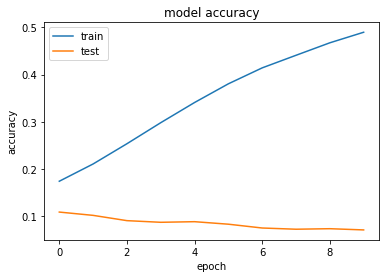

In [34]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')